In [1]:
## read data into pd
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

movie_df = pd.read_table("combineddata.tsv", low_memory=False)


In [2]:
movie_df.head()

,tconst,language,title type,primary title,original title,isAdult,start year,end year,runtime minutes,genres,averageRating,numVotes
0,tt0123368,Czech,movie,...and the Fifth Horseman Is Fear,...a p√°t√Ω jezdec je Strach,0,1965,\N,100,"Drama,War",7.2,594
1,tt0123370,Hindi,movie,Return of Robin Hood,Aaj Ka Robin Hood,0,1988,\N,80,Drama,7.0,30
2,tt0123371,English,movie,Aberration,Aberration,0,1997,\N,93,"Horror,Sci-Fi",4.6,998
3,tt0123373,Danish,movie,Evening Land,Aftenlandet,0,1977,\N,109,"Drama,Sci-Fi",7.2,135
4,tt0123376,English,movie,Alegría,Alegr√≠a,0,1999,\N,94,"Drama,Fantasy,Romance",6.5,565


In [3]:
## get unique languages
languages = []

for lang in movie_df['language']:
    if lang not in languages:
        languages.append(lang)

In [4]:
## get top 30 language counts
## get languages that have more than 100 movies

movie_languages =  movie_df['language'].value_counts()
top_30_lang = movie_languages[1:31].index.tolist()
plus_100_lang = movie_languages[movie_languages>100].index.tolist()
print(top_30_lang)
print(plus_100_lang)

['Spanish', 'French', 'German', 'Italian', 'Japanese', 'Russian', 'Hindi', 'Portuguese', 'Mandarin', 'Turkish', 'Korean', 'Cantonese', 'Greek', 'Swedish', 'Tamil', 'Arabic', 'Polish', 'Malayalam', 'Czech', 'Telugu', 'Dutch', 'Persian', 'Danish', 'Tagalog', 'Finnish', 'Bengali', 'Hungarian', 'Indonesian', 'Chinese', 'Norwegian']
['English', 'Spanish', 'French', 'German', 'Italian', 'Japanese', 'Russian', 'Hindi', 'Portuguese', 'Mandarin', 'Turkish', 'Korean', 'Cantonese', 'Greek', 'Swedish', 'Tamil', 'Arabic', 'Polish', 'Malayalam', 'Czech', 'Telugu', 'Dutch', 'Persian', 'Danish', 'Tagalog', 'Finnish', 'Bengali', 'Hungarian', 'Indonesian', 'Chinese', 'Norwegian', 'Hebrew', 'Romanian', 'Kannada', 'Thai', 'Serbo-Croatian', 'Bulgarian', 'Malay', 'Serbian', 'None', 'Marathi', 'Ukrainian', 'Croatian', 'Punjabi', 'Georgian', 'Slovenian', 'Slovak', 'Vietnamese', 'Estonian', 'Latvian', 'Lithuanian', 'Azerbaijani', 'Catalan', 'Icelandic', 'Armenian', 'Albanian', 'Urdu', 'Afrikaans', 'Gujarati', 

In [5]:
# split into english and nonenglish tables

df_english =movie_df.query("language == 'English' & numVotes>100")
df_nonenglish = movie_df.query("language != 'English' & numVotes>100")


59731
56508


array([[<AxesSubplot: title={'center': 'averageRating'}>]], dtype=object)

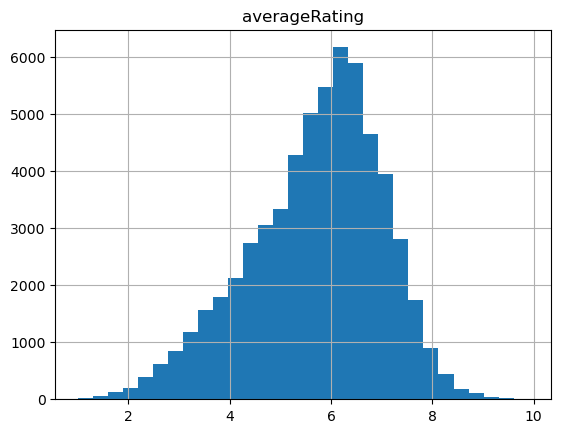

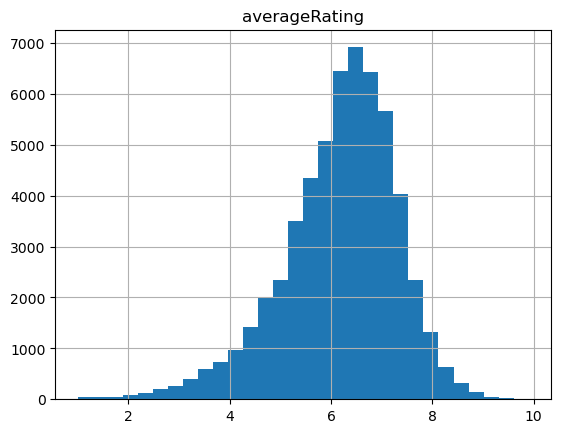

In [6]:


#print(df_english_np)
#np.histogram(df_english_np, bins='auto')

print(len(df_english))
print(len(df_nonenglish))

#graph english average rating histogram, and nonenglish average rating histogram
df_english.hist(column='averageRating', bins=30)
df_nonenglish.hist(column='averageRating', bins=30)

In [7]:
#get x and y point to graph scatterplot for english and nonenglish movies for number of votes vs average rating

poly_x_eng = pd.DataFrame(df_english['numVotes']).to_numpy()
poly_y_eng = pd.DataFrame(df_english['averageRating']).to_numpy()

poly_x_noneng = pd.DataFrame(df_nonenglish['numVotes']).to_numpy()
poly_y_noneng = pd.DataFrame(df_nonenglish['averageRating']).to_numpy()


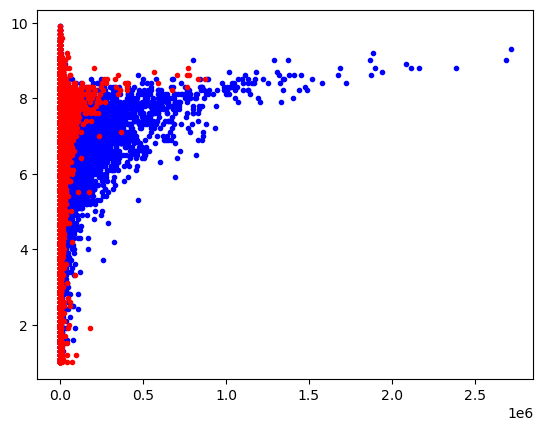

In [8]:
#poly = pd.DataFrame( {'x' : poly_x_eng, 'y': poly_y_eng })
#graph number of votes vs average rating
#blue is english movies
#red is nonenglish movies
plt.plot(poly_x_eng, poly_y_eng, 'b.')
plt.plot(poly_x_noneng, poly_y_noneng, 'r.')

Spanish


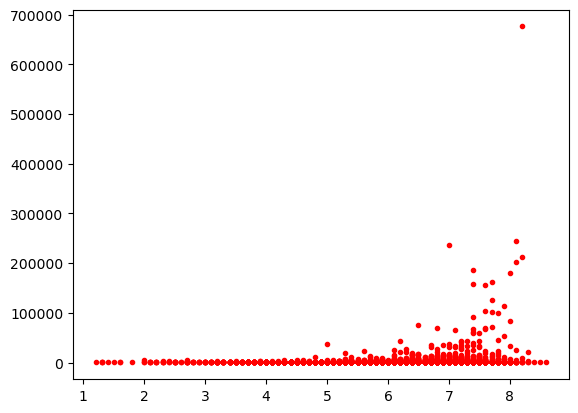

French


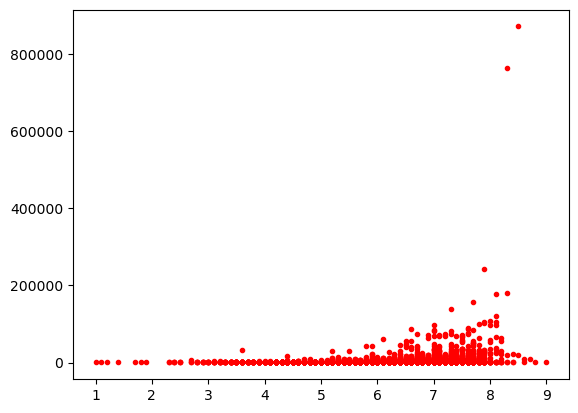

German


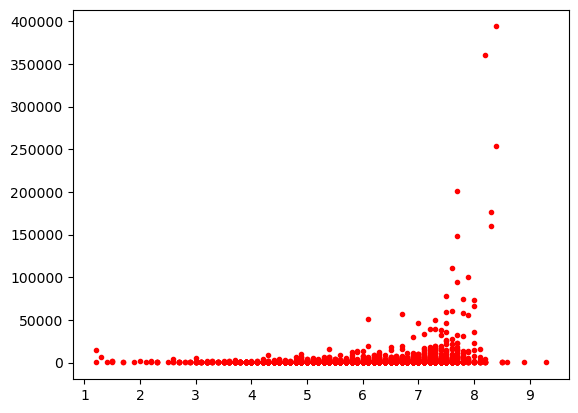

Italian


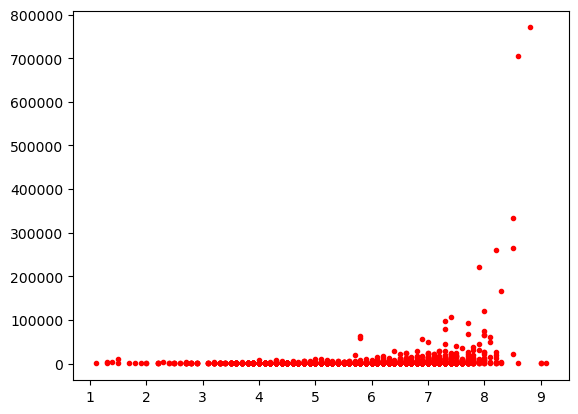

Japanese


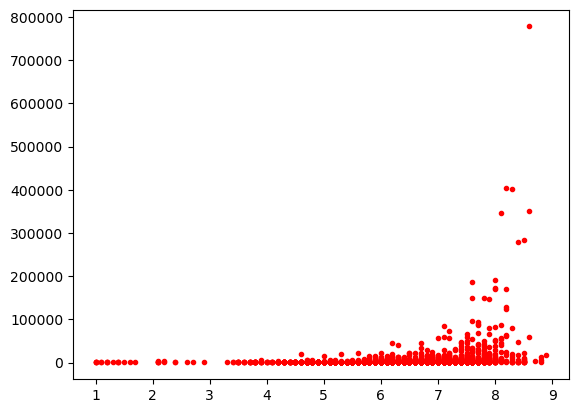

In [9]:
#graph average rating vs number of votes for five languages with the most movies that isn't english
#1. Spanish, 2. French, 3. German, 4. Italian, 5. Japanese 

for i in top_30_lang[0:5]:
    ind_lang = "language == '"+ i + "' & numVotes>100"
    print(i)
    df_ino30 = movie_df.query(ind_lang)
    #df_ino30.hist(column='averageRating', bins=30, label = i)
    x = pd.DataFrame(df_ino30['numVotes']).to_numpy()
    y = pd.DataFrame(df_ino30['averageRating']).to_numpy()
    plt.plot(y, x, 'r.')
    plt.show()
    

In [10]:
#Get the top 30 non english languages with the highest average rating
top_30_nonenglish_averageRating = []
for j in top_30_lang:
    ind_lang = "language == '"+ j + "' & numVotes>20"
    df_ino30 = movie_df.query(ind_lang)
    avg = np.average(pd.DataFrame(df_ino30['averageRating']).to_numpy())
    num_movies = len((pd.DataFrame(df_ino30['averageRating']).to_numpy()))
    top_30_nonenglish_averageRating.append([j, avg])

top_30_nonenglish_averageRating = sorted(top_30_nonenglish_averageRating, key=lambda x: x[1], reverse=True)    
print(top_30_nonenglish_averageRating)

[['Bengali', 6.886743772241993], ['Hungarian', 6.595495495495496], ['Telugu', 6.502911467617351], ['Tagalog', 6.449162479061976], ['Chinese', 6.4156911581569105], ['Portuguese', 6.409913793103448], ['Japanese', 6.4034957934435734], ['Indonesian', 6.354149377593361], ['Czech', 6.3011347517730485], ['Arabic', 6.282700964630224], ['Tamil', 6.275774793388431], ['Russian', 6.2558164584230935], ['Dutch', 6.238725154215215], ['Korean', 6.226206285967242], ['German', 6.160683188211654], ['French', 6.136642238507661], ['Malayalam', 6.093179190751446], ['Spanish', 6.070416504476449], ['Mandarin', 5.994475655430711], ['Hindi', 5.988427167113494], ['Polish', 5.980893300248138], ['Norwegian', 5.956438026474128], ['Cantonese', 5.929285059578369], ['Danish', 5.909343794579172], ['Greek', 5.907990599294947], ['Italian', 5.894101989352761], ['Persian', 5.846470185058259], ['Finnish', 5.735765379113019], ['Swedish', 5.699948400412796], ['Turkish', 5.654069938289744]]


In [11]:
#Get average rating for English movies
ind_lang = "language == 'English'"# & numVotes>100"
df_ino30 = movie_df.query(ind_lang)
eng_avg = np.average(pd.DataFrame(df_ino30['averageRating']).to_numpy())
eng_num_movies = len((pd.DataFrame(df_ino30['averageRating']).to_numpy()))
eng_avg

6.079797268632602

['Bengali', 6.886743772241993]


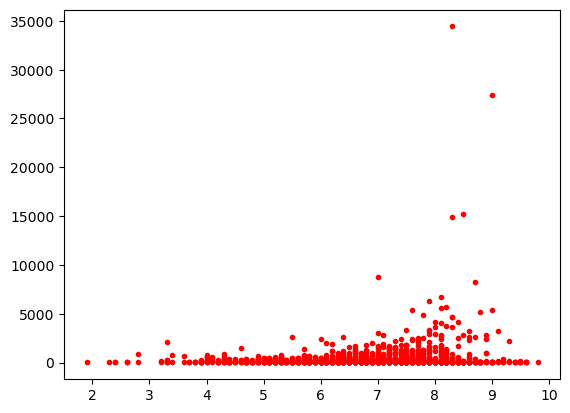

['Hungarian', 6.595495495495496]


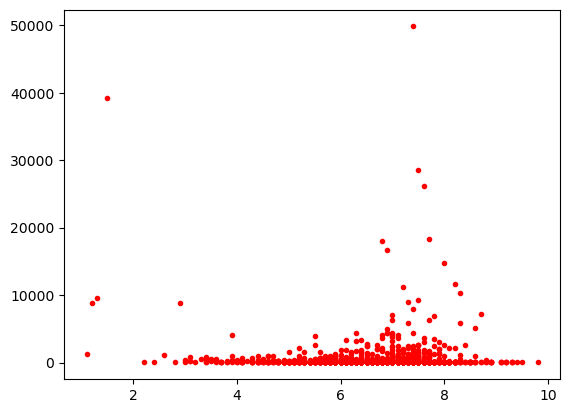

['Telugu', 6.502911467617351]


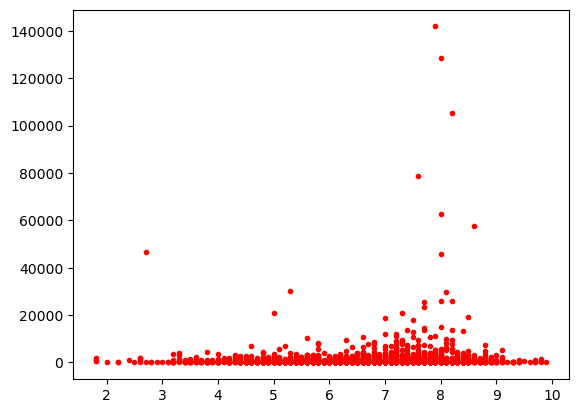

['Tagalog', 6.449162479061976]


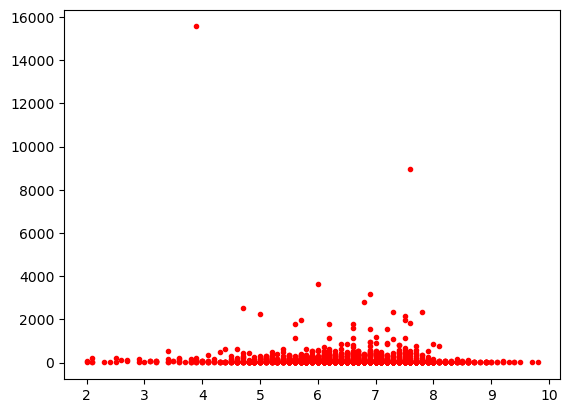

['Chinese', 6.4156911581569105]


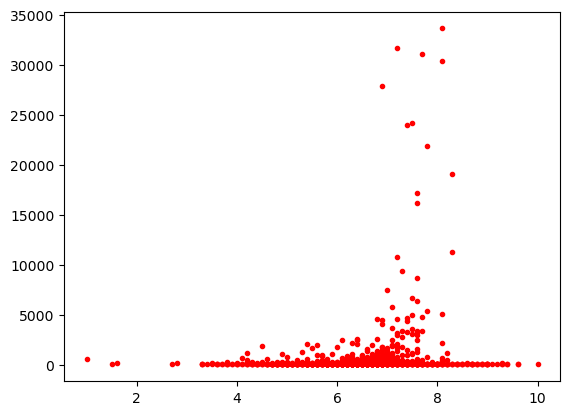

array([[<AxesSubplot: title={'center': 'averageRating'}>]], dtype=object)

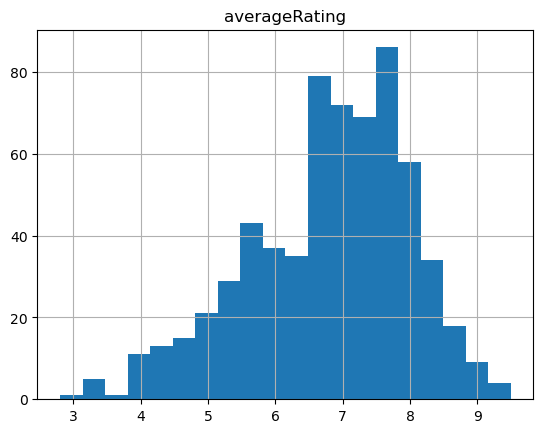

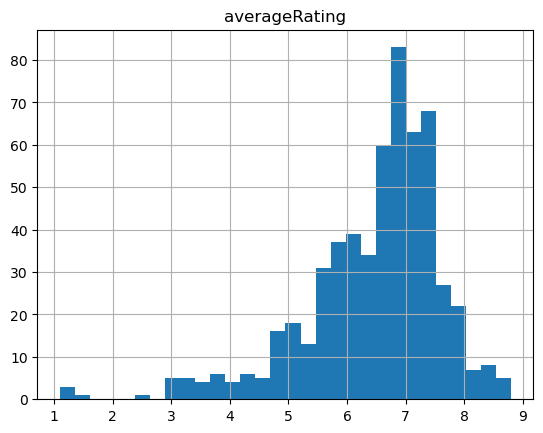

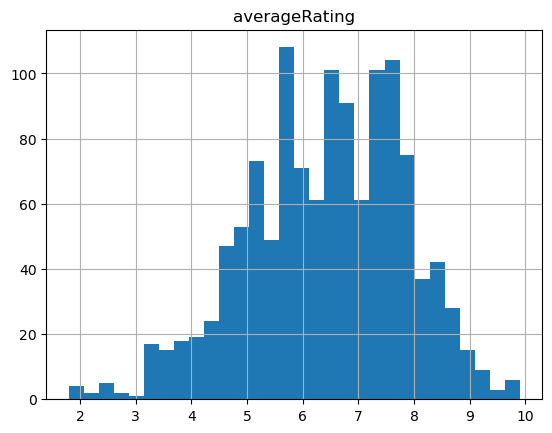

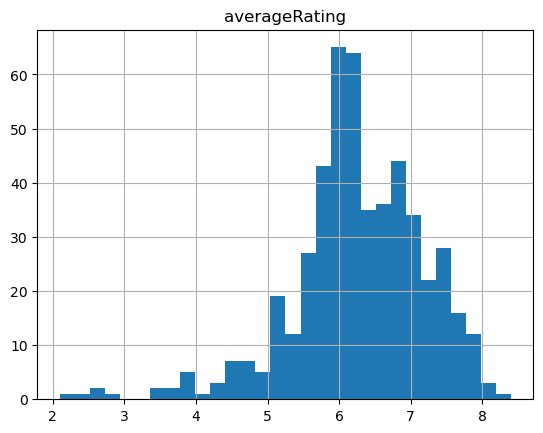

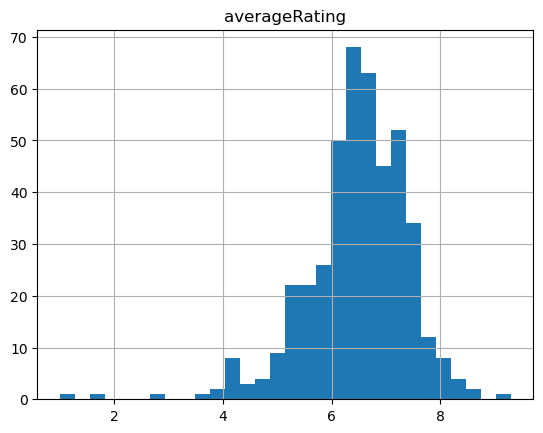

In [14]:
#Graph scatter plots of average rating vs num votes for movie for top five non english movies with the highest average rating
for k in top_30_nonenglish_averageRating[0:5]:
    ind_lang = "language == '"+ k[0] + "'"# & numVotes>100"
    print(k)
    df_ino30 = movie_df.query(ind_lang)
    #df_ino30.hist(column='averageRating', bins=30, label = i)
    x = pd.DataFrame(df_ino30['numVotes']).to_numpy()
    y = pd.DataFrame(df_ino30['averageRating']).to_numpy()
    plt.plot(y, x, 'r.')
    plt.show()
# Graph histograms of top 5 non english languages with highest average rating    
movie_df.query("language == 'Bengali' & numVotes>100").hist(column='averageRating', bins=20)    
movie_df.query("language == 'Hungarian' & numVotes>100").hist(column='averageRating', bins=30)    
movie_df.query("language == 'Telugu' & numVotes>100").hist(column='averageRating', bins=30)    
movie_df.query("language == 'Tagalog' & numVotes>100").hist(column='averageRating', bins=30)    
movie_df.query("language == 'Chinese' & numVotes>100").hist(column='averageRating', bins=30)

array([[<AxesSubplot: title={'center': 'averageRating'}>]], dtype=object)

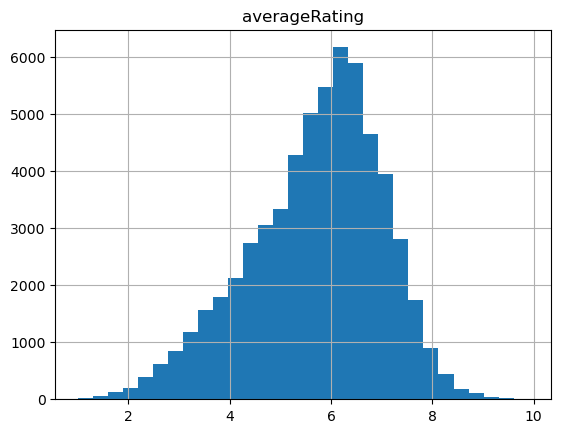

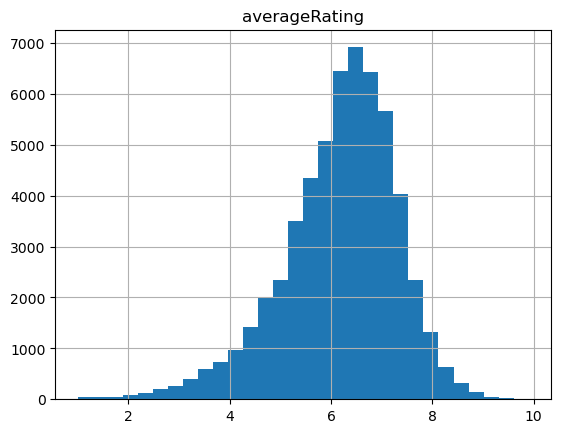

In [15]:
#Histograms of english and non english average ratings vs number of votes
df_english.hist(column='averageRating', bins=30)
df_nonenglish.hist(column='averageRating', bins=30)

In [17]:
#Get most popular genre and corresponding average rating for all movies for each year
#Popular here is defined as movies with at least 25 votes, and a genre containing at least 100 movies for that year


movie_df = movie_df[movie_df['start year'].apply(lambda x: str(x).isdigit())]

movie_years = movie_df['start year'].value_counts().index.tolist()
movie_genres2 = movie_df['genres'].value_counts().index.tolist()

movie_genres = []


for genres in movie_genres2:
    temp = genres.split(',')
    #print(temp)
    if len(temp) ==1:
        movie_genres.append(temp[0])
#print(movie_genres)
movie_df['start year'] = movie_df['start year'].astype(int)

year_genre_rating = [['year', 'genre', 'avg_rating']]

print('here')

for year in movie_years:
    temp_top_year_genre = []
    for genre in movie_genres:
        #print(genre)
        #if not (genre == "Drama"):
        temp_df = movie_df[movie_df['start year'] == year].query("genres.str.contains('"+ genre + "') & numVotes>25")
        if len(temp_df) > 100:
            avg_rating = np.average(pd.DataFrame(temp_df['averageRating']).to_numpy())
            temp_top_year_genre.append([year, genre, avg_rating, len(temp_df)])
    #print(temp_top_year_genre)
    temp_max_avg = 0
    temp_info = []
    for row in temp_top_year_genre:
        if row[2] > temp_max_avg:
            #print(row)
            temp_max_avg = row[2]
            temp_info = row
            #print(temp_info)
    if len(temp_info) > 0:
        print(temp_info)        
        year_genre_rating.append(temp_info)
    
print(year_genre_rating)
    
        #something_db = movie_df.query("year =="+ year +" & genre =='" + genre + "'")
        #.query('column_name.str.contains("text here")')
    

here
[2019, 'Documentary', 7.071909167367536, 1189]
[2018, 'Documentary', 7.124149659863946, 1176]
[2017, 'Documentary', 7.097128794093519, 1219]
[2016, 'Documentary', 7.099211218229623, 1141]
[2015, 'Documentary', 7.128994614003591, 1114]
[2014, 'Documentary', 7.148565965583174, 1046]
[2012, 'Documentary', 7.093450184501845, 1084]
[2021, 'Documentary', 7.106469298245614, 912]
[2013, 'Documentary', 7.092843511450381, 1048]
[2022, 'Documentary', 7.251724137931035, 667]
[2020, 'Documentary', 7.082358490566037, 1060]
[2011, 'Documentary', 7.201685393258427, 890]
[2010, 'Documentary', 7.20210396039604, 808]
[2009, 'Documentary', 7.1935013262599465, 754]
[2008, 'Documentary', 7.25884101040119, 673]
[2007, 'Documentary', 7.265522875816994, 612]
[2006, 'Documentary', 7.261702127659575, 564]
[2005, 'Documentary', 7.240670859538784, 477]
[2004, 'Documentary', 7.235103926096998, 433]
[2003, 'Documentary', 7.228279883381925, 343]
[2002, 'Documentary', 7.13894389438944, 303]
[2001, 'Documentary', 

In [18]:
#Get most popular genre and corresponding average rating for nonenglish movies for each year
#Popular here is defined as movies with at least 25 votes, and a genre containing at least 50 movies for that year

none_movie_df = df_nonenglish[df_nonenglish['start year'].apply(lambda x: str(x).isdigit())]

none_movie_years = none_movie_df['start year'].value_counts().index.tolist()
none_movie_genres2 = none_movie_df['genres'].value_counts().index.tolist()

none_movie_genres = []


for genres in none_movie_genres2:
    temp = genres.split(',')
    #print(temp)
    if len(temp) ==1:
        none_movie_genres.append(temp[0])
#print(movie_genres)
#print(none_movie_df['start year'].astype(int))
none_start_year = none_movie_df['start year'].astype(int)
none_movie_df.loc['start year'] = none_start_year

none_year_genre_rating = [['year', 'genre', 'avg_rating']]

print('here')

for year in none_movie_years:
    temp_top_year_genre = []
    for genre in none_movie_genres:
        #print(genre)
        #if not (genre == "Drama"):
        temp_df = none_movie_df[none_movie_df['start year'] == year].query("genres.str.contains('"+ genre + "') & numVotes>25")
        if len(temp_df) > 50:
            avg_rating = np.average(pd.DataFrame(temp_df['averageRating']).to_numpy())
            temp_top_year_genre.append([year, genre, avg_rating, len(temp_df)])
    #print(temp_top_year_genre)
    temp_max_avg = 0
    temp_info = []
    for row in temp_top_year_genre:
        if row[2] > temp_max_avg:
            #print(row)
            temp_max_avg = row[2]
            temp_info = row
            #print(temp_info)
    if len(temp_info) > 0:
        print(temp_info)        
        none_year_genre_rating.append(temp_info)
    
print(none_year_genre_rating)
    
        #something_db = movie_df.query("year =="+ year +" & genre =='" + genre + "'")
        #.query('column_name.str.contains("text here")')
    

here
['2018', 'Documentary', 7.123030303030304, 165]
['2019', 'Documentary', 7.086516853932585, 178]
['2017', 'Documentary', 7.055421686746987, 166]
['2016', 'Documentary', 7.082119205298011, 151]
['2015', 'Documentary', 7.064705882352943, 119]
['2022', 'Documentary', 6.973417721518987, 79]
['2014', 'Documentary', 7.151968503937008, 127]
['2021', 'Documentary', 7.1457943925233645, 107]
['2013', 'Documentary', 7.152475247524753, 101]
['2012', 'Biography', 6.934545454545455, 55]
['2011', 'Documentary', 7.155434782608694, 92]
['2020', 'Documentary', 7.014666666666667, 150]
['2010', 'Documentary', 7.302352941176471, 85]
['2009', 'Documentary', 7.1558441558441555, 77]
['2008', 'Documentary', 7.272881355932204, 59]
['2006', 'Documentary', 7.096666666666667, 60]
['2007', 'Documentary', 7.045901639344263, 61]
['2005', 'Drama', 6.232871012482662, 721]
['2004', 'Drama', 6.305607476635514, 642]
['2003', 'Crime', 6.310784313725491, 102]
['2001', 'Drama', 6.355555555555555, 522]
['2002', 'Drama', 6

In [19]:
#Get most popular genre and corresponding average rating for english movies for each year
#Popular here is defined as movies with at least 25 votes, and a genre containing at least 50 movies for that year

e_movie_df = df_english[df_english['start year'].apply(lambda x: str(x).isdigit())]

e_movie_years = e_movie_df['start year'].value_counts().index.tolist()
e_movie_genres2 = e_movie_df['genres'].value_counts().index.tolist()

e_movie_genres = []


for genres in e_movie_genres2:
    temp = genres.split(',')
    #print(temp)
    if len(temp) ==1:
        e_movie_genres.append(temp[0])
#print(movie_genres)
#print(none_movie_df['start year'].astype(int))
e_start_year = e_movie_df['start year'].astype(int)
e_movie_df.loc['start year'] = e_start_year

e_year_genre_rating = [['year', 'genre', 'avg_rating']]

print('here')

for year in e_movie_years:
    temp_top_year_genre = []
    for genre in e_movie_genres:
        #print(genre)
        #if not (genre == "Drama"):
        temp_df = e_movie_df[e_movie_df['start year'] == year].query("genres.str.contains('"+ genre + "') & numVotes>25")
        if len(temp_df) > 50:
            avg_rating = np.average(pd.DataFrame(temp_df['averageRating']).to_numpy())
            temp_top_year_genre.append([year, genre, avg_rating, len(temp_df)])
    #print(temp_top_year_genre)
    temp_max_avg = 0
    temp_info = []
    for row in temp_top_year_genre:
        if row[2] > temp_max_avg:
            #print(row)
            temp_max_avg = row[2]
            temp_info = row
            #print(temp_info)
    if len(temp_info) > 0:
        print(temp_info)        
        e_year_genre_rating.append(temp_info)
    
print(e_year_genre_rating)
    
        #something_db = movie_df.query("year =="+ year +" & genre =='" + genre + "'")
        #.query('column_name.str.contains("text here")')
    

here
['2018', 'Documentary', 6.975235849056604, 424]
['2017', 'Documentary', 6.980837004405287, 454]
['2019', 'Documentary', 7.032727272727272, 385]
['2016', 'Documentary', 6.94634703196347, 438]
['2014', 'Documentary', 6.98537170263789, 417]
['2015', 'Documentary', 6.9743589743589745, 429]
['2013', 'Biography', 7.002054794520547, 146]
['2020', 'Documentary', 6.944410876132932, 331]
['2012', 'Biography', 6.978301886792453, 106]
['2021', 'Documentary', 6.943354430379748, 316]
['2011', 'Documentary', 7.020731707317074, 328]
['2009', 'Documentary', 7.021311475409837, 244]
['2010', 'Documentary', 6.989855072463768, 276]
['2022', 'Documentary', 6.936123348017621, 227]
['2008', 'Documentary', 7.128968253968254, 252]
['2007', 'Documentary', 7.136444444444444, 225]
['2006', 'Documentary', 7.168556701030928, 194]
['2005', 'Documentary', 7.201863354037267, 161]
['2004', 'Documentary', 7.088050314465409, 159]
['1999', 'Documentary', 6.849206349206349, 63]
['2002', 'Documentary', 7.049074074074074